---

### Now lets try to make the fft for different time regions

In [59]:
c3 = r.TCanvas()


centers = [x + 700./4700/2 for x in times] #times[0:int(len(times)/2)] ]
bins = ks

testvec = []

#lets break this up into 50 us chunks
boundaries = [30 + x*50 for x in range(12)]
print(boundaries)

[30, 80, 130, 180, 230, 280, 330, 380, 430, 480, 530, 580]


In [60]:
binboundaries = []
for boundary in boundaries:
    for i,center in enumerate(centers):
        if(center > boundary):
            binboundaries.append(i)
            break
binboundaries.append(len(centers)-1)
print(binboundaries)

[1, 337, 672, 1008, 1344, 1680, 2015, 2351, 2687, 3022, 3358, 3694, 3827]


In [61]:
ffthists = []
for i, boundary in enumerate(binboundaries):
    if boundary == binboundaries[len(binboundaries)-1]:
        break
    htest = r.TH1D("htest","htest",(binboundaries[i+1] - 1) - boundary, centers[boundary],centers[binboundaries[i+1] - 1])
    for bin, j in enumerate(range(boundary, binboundaries[i+1])):
        htest.SetBinContent(bin,bins[j])
    ffthists.append(htest.Clone("fft_"+str(i)))
print(ffthists)

[<ROOT.TH1D object ("fft_0") at 0x7f007a93b140>, <ROOT.TH1D object ("fft_1") at 0x7fffe1e21680>, <ROOT.TH1D object ("fft_2") at 0x7f0075b70aa0>, <ROOT.TH1D object ("fft_3") at 0x7f0076819bf0>, <ROOT.TH1D object ("fft_4") at 0x7f007a93b530>, <ROOT.TH1D object ("fft_5") at 0x7f007681a050>, <ROOT.TH1D object ("fft_6") at 0x7f007681a4b0>, <ROOT.TH1D object ("fft_7") at 0x7f0076813a50>, <ROOT.TH1D object ("fft_8") at 0x7f0076813eb0>, <ROOT.TH1D object ("fft_9") at 0x7f0076814310>, <ROOT.TH1D object ("fft_10") at 0x7f0076807c40>, <ROOT.TH1D object ("fft_11") at 0x7f00767fd370>]


Warning in <TFile::Append>: Replacing existing TH1: htest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htest (Potential memory leak).


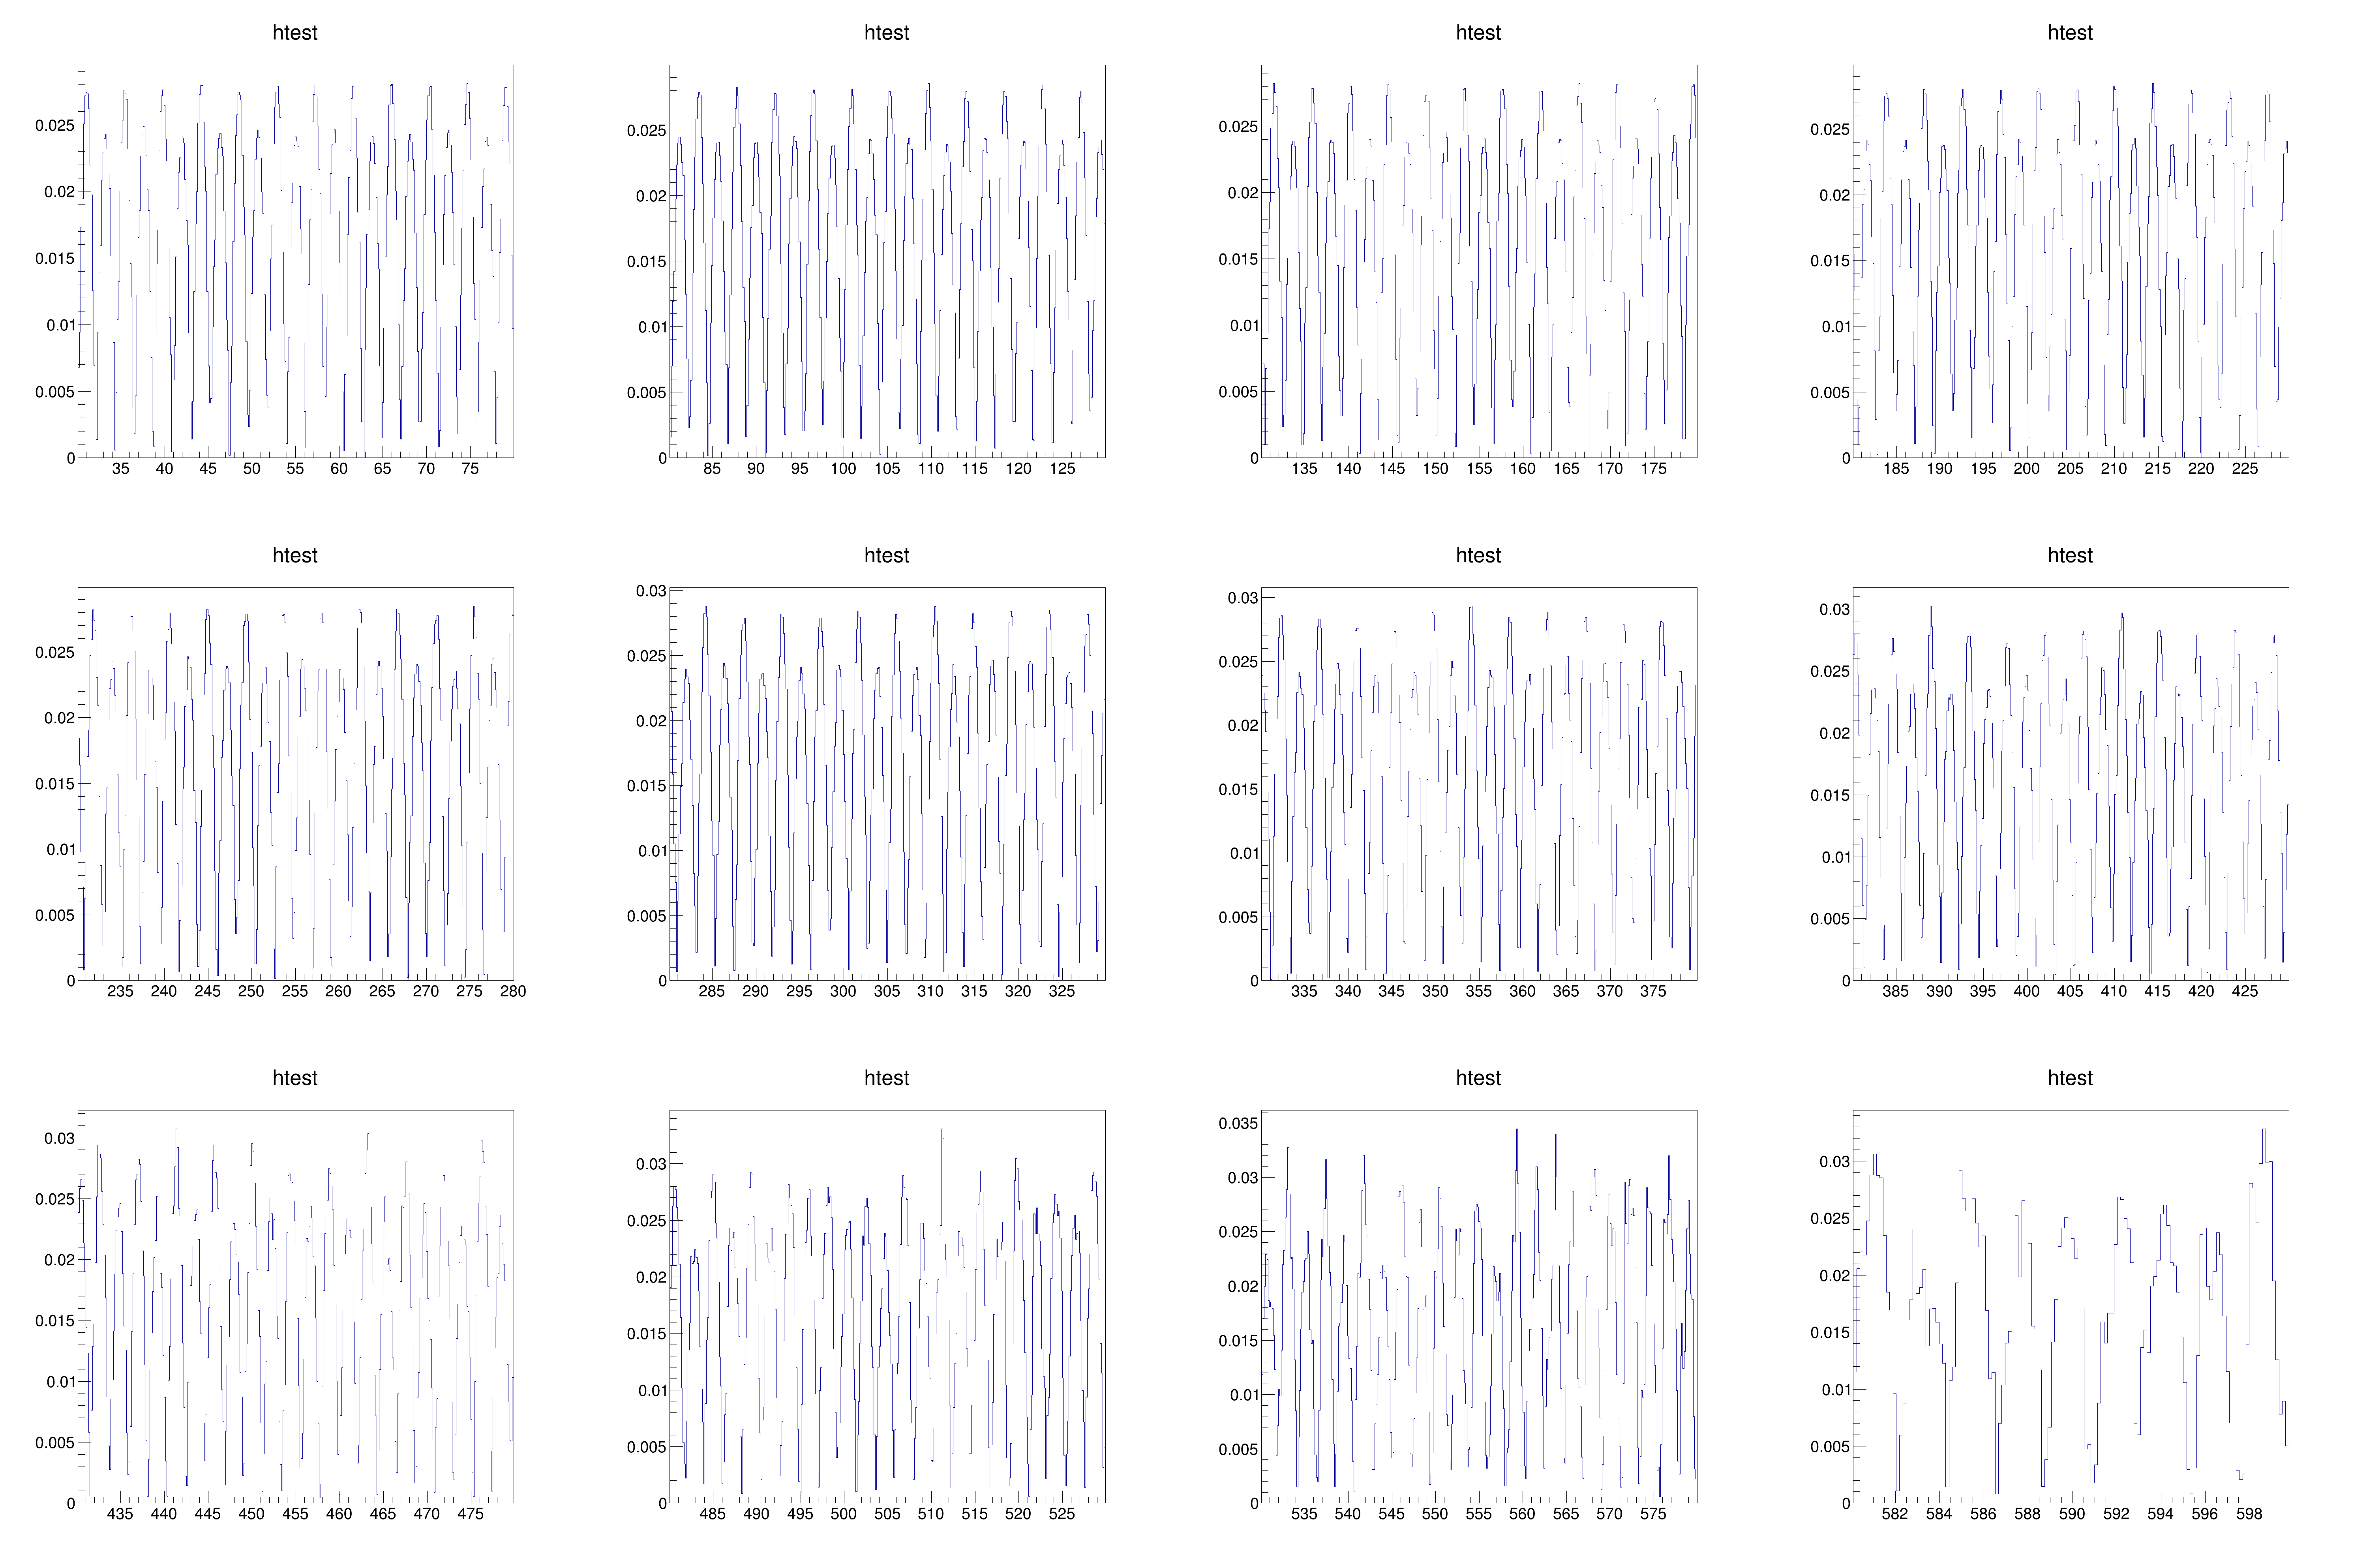

In [62]:
c = r.TCanvas("c","c",6000,4000)
c.Divide(4,3)
for i, h in enumerate(ffthists):
    c.cd(i+1)
    h.Draw()
c.Draw()

335 49.893617021276626 30.010638297872333 79.90425531914896
0.14893617021276603 0.020042643923240927
13.428571428571422 6.714285714285711
334 49.74468085106383 80.05319148936172 129.79787234042556
0.14893617021276598 0.020102651839178785
13.428571428571429 6.7142857142857135
335 49.89361702127661 129.94680851063828 179.8404255319149
0.148936170212766 0.02004264392324093
13.428571428571423 6.714285714285712
335 49.89361702127664 179.98936170212764 229.88297872340428
0.1489361702127661 0.02004264392324092
13.428571428571416 6.714285714285708
335 49.89361702127661 230.031914893617 279.9255319148936
0.148936170212766 0.02004264392324093
13.428571428571423 6.714285714285712
334 49.74468085106378 280.0744680851064 329.81914893617017
0.1489361702127658 0.020102651839178805
13.428571428571441 6.71428571428572
335 49.89361702127661 329.96808510638294 379.86170212765956
0.148936170212766 0.02004264392324093
13.428571428571423 6.714285714285712
335 49.893617021276555 380.01063829787233 429.904255

Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning

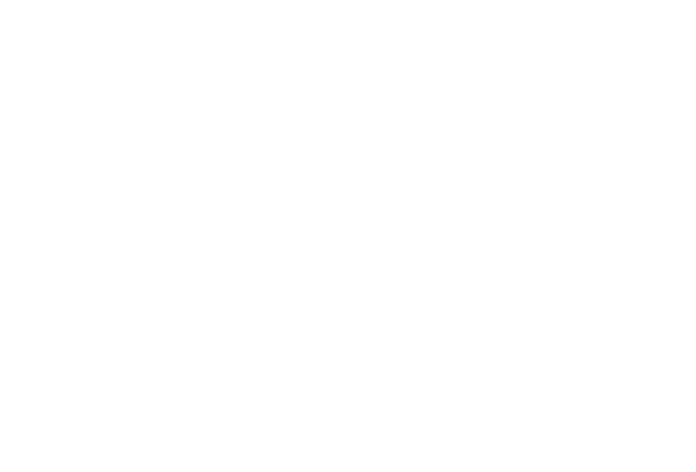

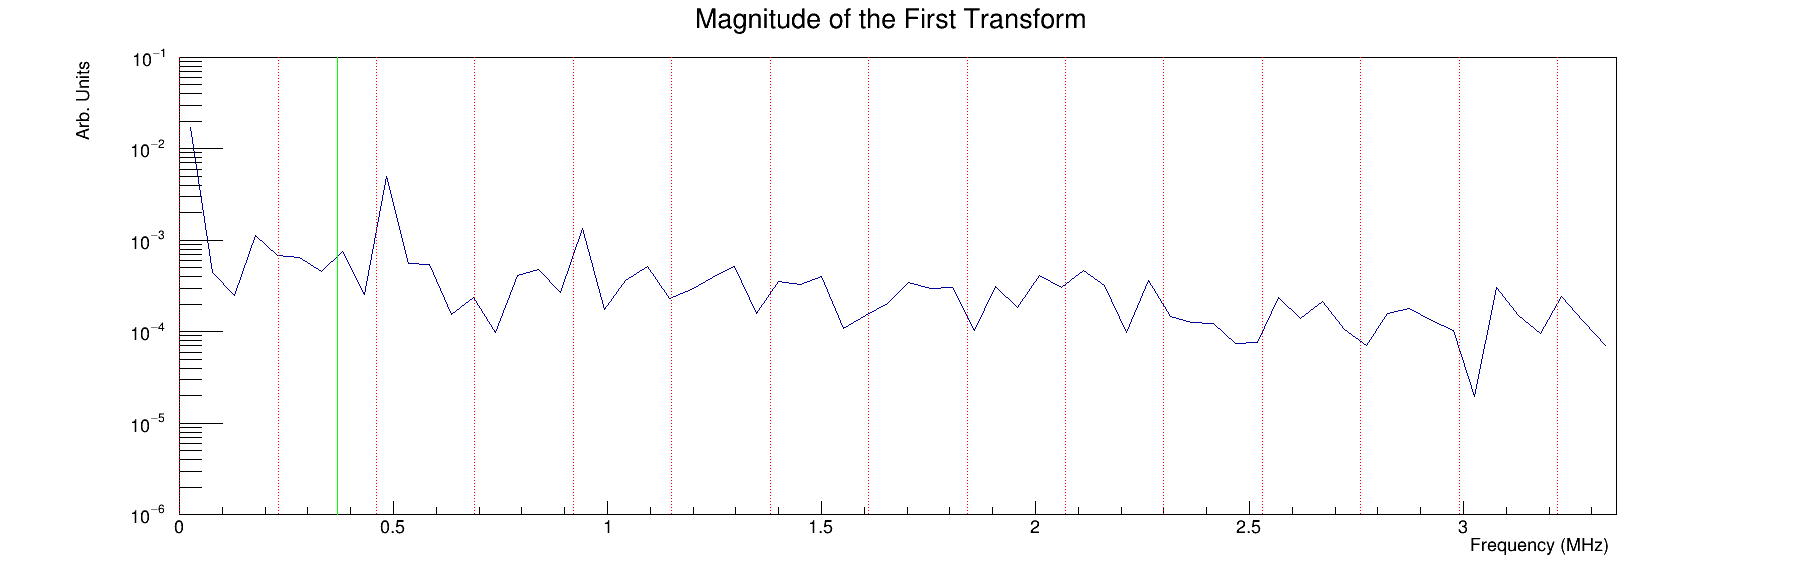

In [63]:
ffts = []

for htest in ffthists:
    residuals5param = htest
    nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow

    #apply a windows function to try to get rid of the imaginary peaks
    welchVec = []
    for i in range(nBins):
        unwindowed = residuals5param.GetBinContent(i)
        welch = 1 #- ( ( i - (nBins - 1) / 2) / ((nBins - 1) / 2) )**2
        welchVec.append(welch)
        residuals5param.SetBinContent(i, unwindowed *  welch)

    residuals5param.Draw()
    residuals5param.GetXaxis().SetRangeUser(30,700)
    residuals5param.SetTitle("(Windowed) Residuals of the 5-parameter Fit")
    c3.Draw() 
    
    hxform = r.TH1D()
    hxform = 0
    r.TVirtualFFT.SetTransform(0)
    hxform = residuals5param.FFT(hxform,"MAG P")
    hxform.SetTitle("Magnitude of the First Transform")
    #NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
    #    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
    normXform = hxform.GetEntries()
    hxform.Scale(1/normXform)
    c2 = r.TCanvas("c2","c2",1800,600)
    c2.cd()
    #c2.SetLogy()
    hxform.GetXaxis().SetTitle("Frequency (MHz)")
    hxform.GetYaxis().SetTitle("Arb. Units")
    hxform.Draw("HIST P0 L")
    c2.Draw()

    Npart = residuals5param.GetSize() - 2
    minBinCenter = residuals5param.GetXaxis().GetBinCenter(0)
    maxBinCenter = residuals5param.GetXaxis().GetBinCenter(Npart)

    capT = maxBinCenter - minBinCenter
    print(Npart, capT, minBinCenter, maxBinCenter)
    deltaT = capT/Npart #microseconds
    deltaF = 1/capT
    print(deltaT, deltaF)

    deltaTns = deltaT*1000 #nanoseconds
    limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
    limmaxMHz = limmaxHz / math.pow(10.0,6)

    limmax = 2*deltaF*Npart #400-25
    print(limmax,limmaxMHz)
    #hxform.GetXaxis().SetLimits(0,limmax)
    nbins = residuals5param.GetSize() - 2
    hxform.SetBins(Npart,0,limmaxMHz)
    hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
    #hxform.GetXaxis().SetRangeUser(0,1.4)

    residuals5paramXform = hxform.Clone()

    hxform.GetYaxis().SetRangeUser(0.000001,0.1)
    cboline = r.TLine(0.37,0.000001,0.37,0.1)
    cboline.SetLineColor(3)
    cboline.Draw("SAME")
    '''
    oaline = r.TLine(0.23,0.000001,0.23,0.1)
    oaline.SetLineColor(2)
    oaline.Draw("SAME")
    oaline2 = r.TLine(0.23*2,0.000001,0.23*2,0.1)
    oaline2.SetLineColor(2)
    oaline2.Draw("SAME")
    '''
    oalines = []
    for i in range(15):
        oalinei = r.TLine(0.23*i,0.000001,0.23*i,0.1)
        oalinei.SetLineColor(2)
        oalinei.SetLineStyle(3)
        oalinei.Draw()
        oalines.append(oalinei)

    c2.SetLogy()
    c2.Draw()
    
    ffts.append(hxform.Clone())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


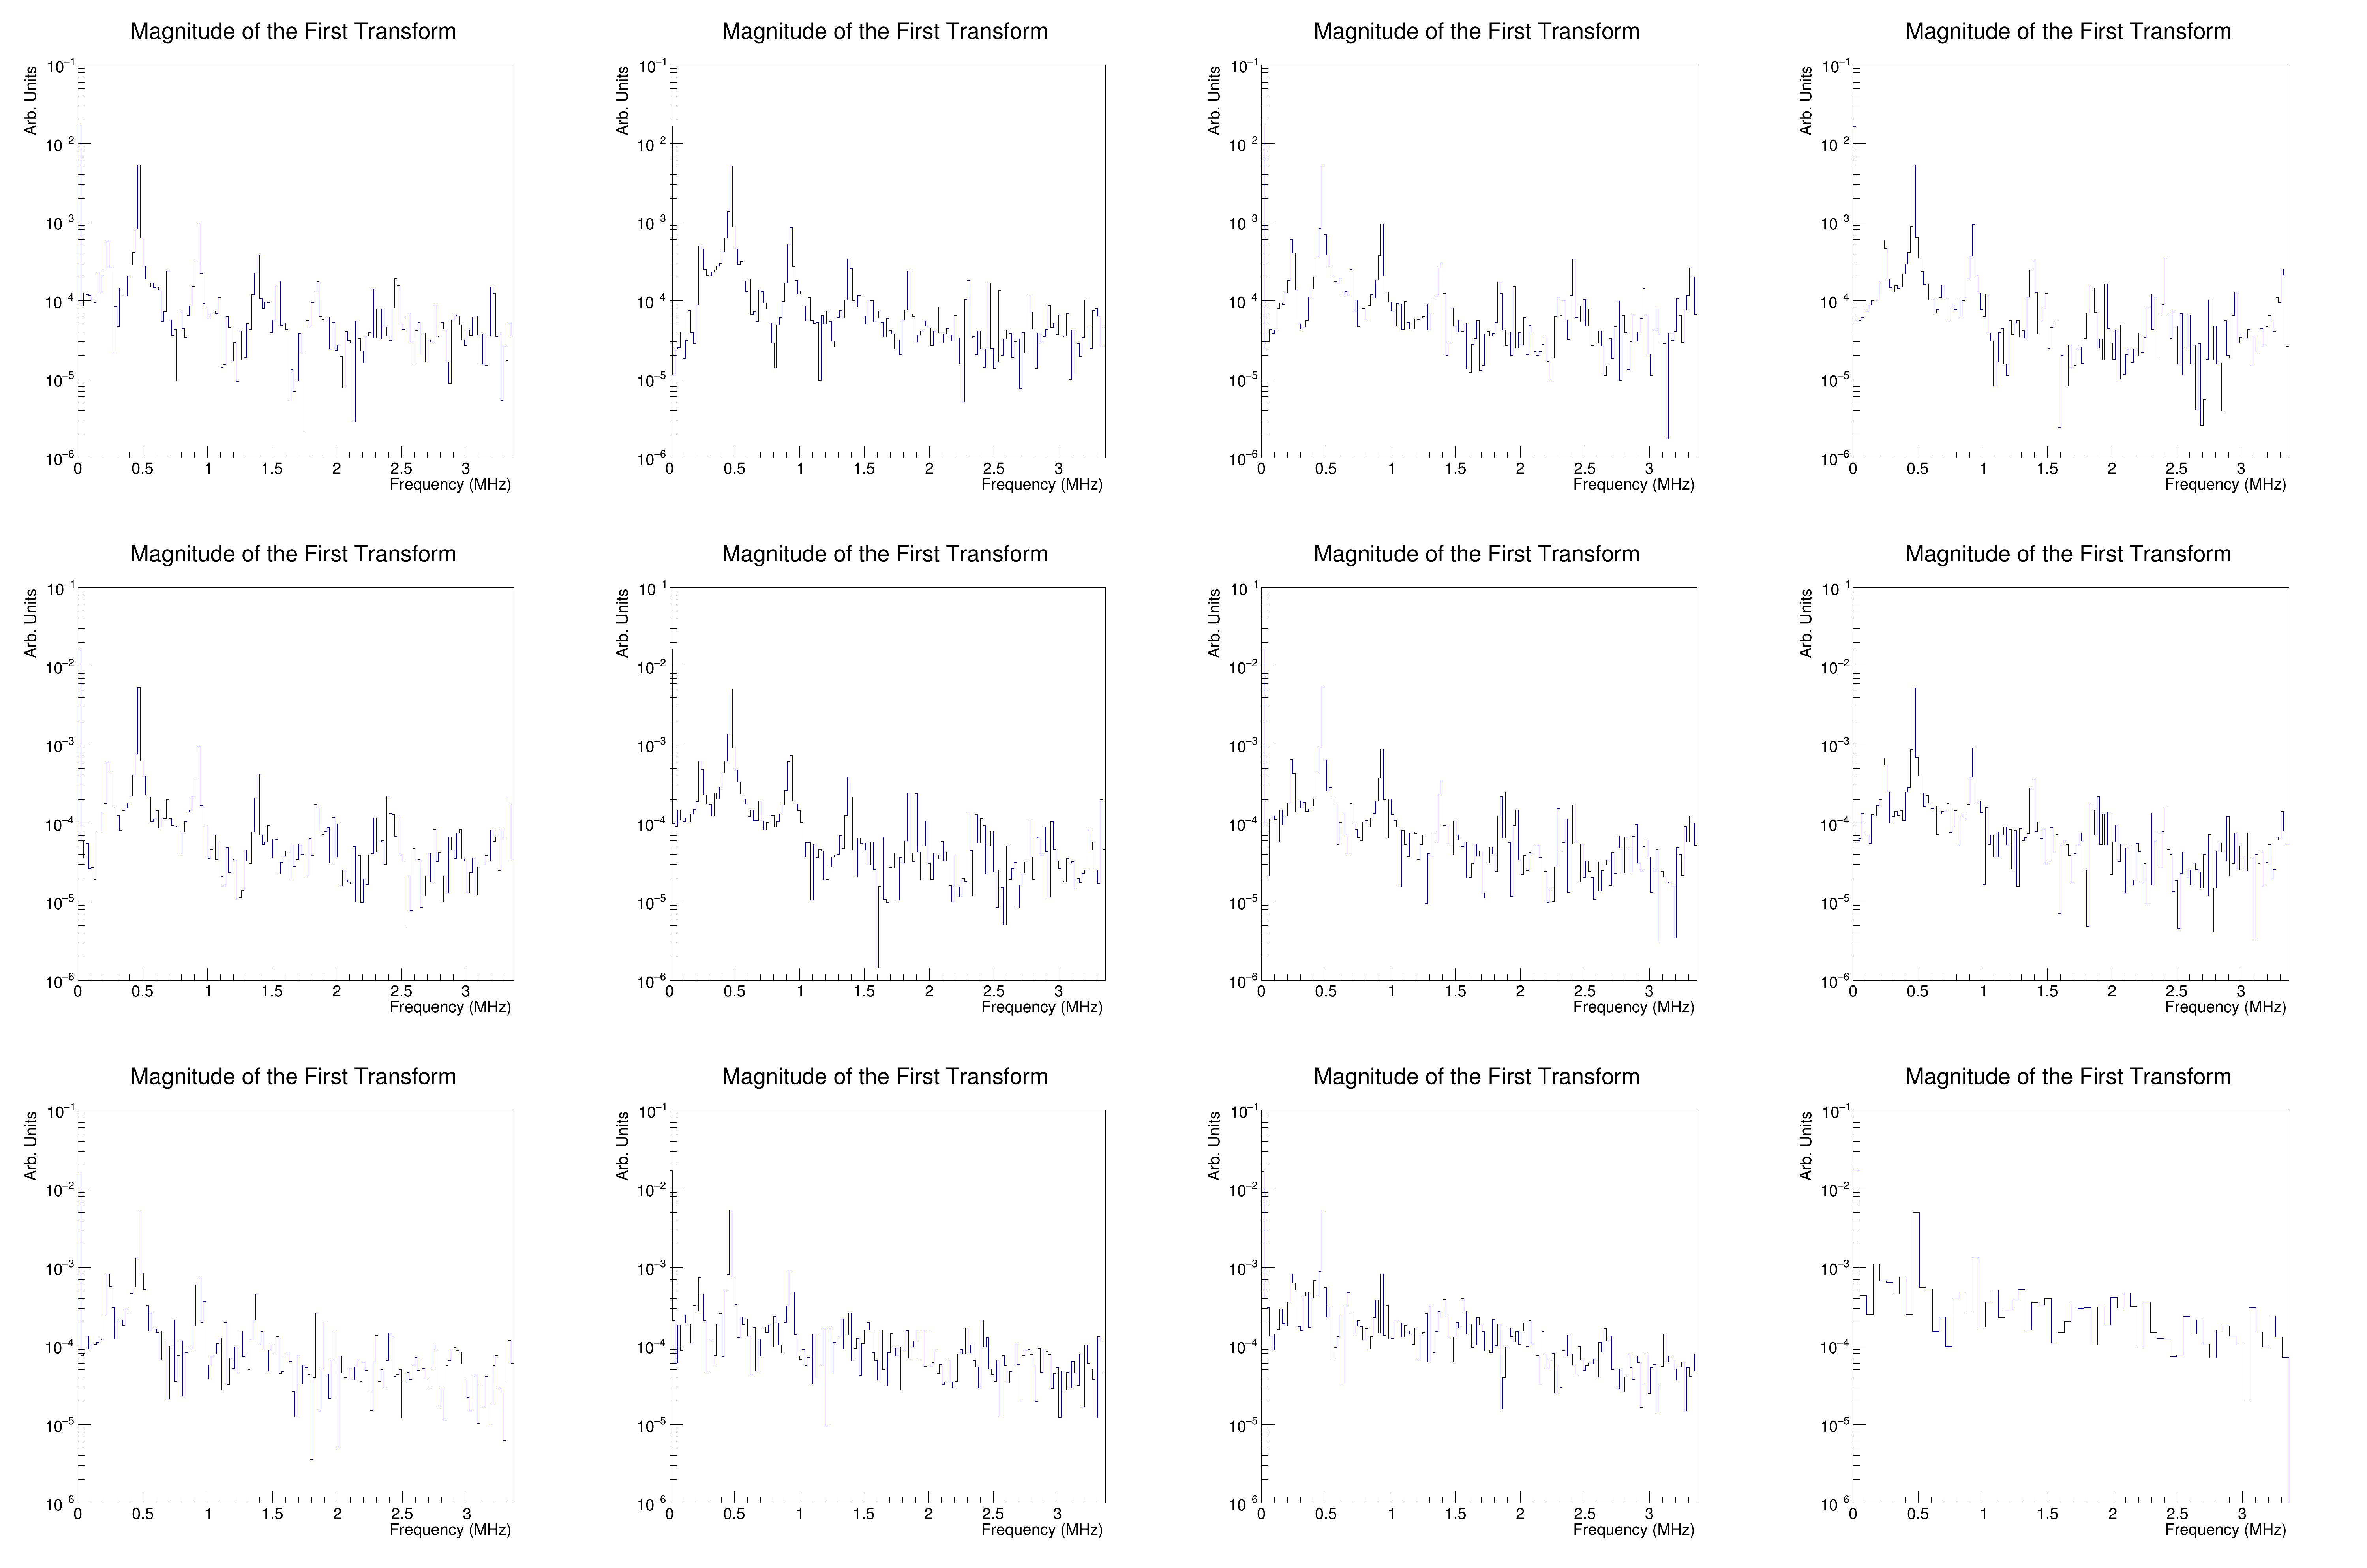

In [64]:
c = r.TCanvas("c","c",6000,4000)
c.Divide(4,3)
for i, h in enumerate(ffts):
    c.cd(i+1)
    r.gPad.SetLogy()
    h.Draw("hist")
c.Draw()